In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [61]:
class KNNClassifier:
    def __init__(self, k=3, distance_func=None):
        self.k = k
        if distance_func is None:
            self.distance_func = self.euclidean_distance
        else:
            self.distance_func = distance_func


    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        if self.k > len(self.y_train):
            raise ValueError("k cannot be greater than the number of training samples")


    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(x1 - x2) ** 2)

    def manhattan_distance(x1, x2):
        return np.sum(np.abs(x1 - x2))
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [self.distance_func(x.flatten(), x_train.flatten()) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_neighbor_labels = self.y_train[k_indices]
            
            if len(k_neighbor_labels) == 0:
                raise ValueError("No neighbors found. Check the dataset or distance function.")
            
            counts = np.bincount(k_neighbor_labels.astype(int).ravel())
            predicted_label = np.argmax(counts)
            predictions.append(predicted_label)
            
        return np.array(predictions)

In [62]:
X = np.array([[1,6], [2,6], [2,7], [3,7], [3,8], [4,9],
              [6,1], [7,2], [7,3], [8,3], [8,4], [9,4]])

#blue = 1
#red = 0

y = np.array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [63]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [64]:
def plot_decision_boundaries(classifier, X, y, means, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    colors = plt.get_cmap('tab10', np.unique(y).size + 1)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=colors)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolor='k', s=40)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label=f'Class {i}',
                   markerfacecolor=colors(i), markersize=10) for i in range(np.unique(y).size)
    ], loc='upper right')
    plt.show()

In [83]:
distance_func = euclidean_distance

k = 1
knn = KNNClassifier(k=k, distance_func=distance_func)
knn.fit(X, y)
y_pred = knn.predict(X)

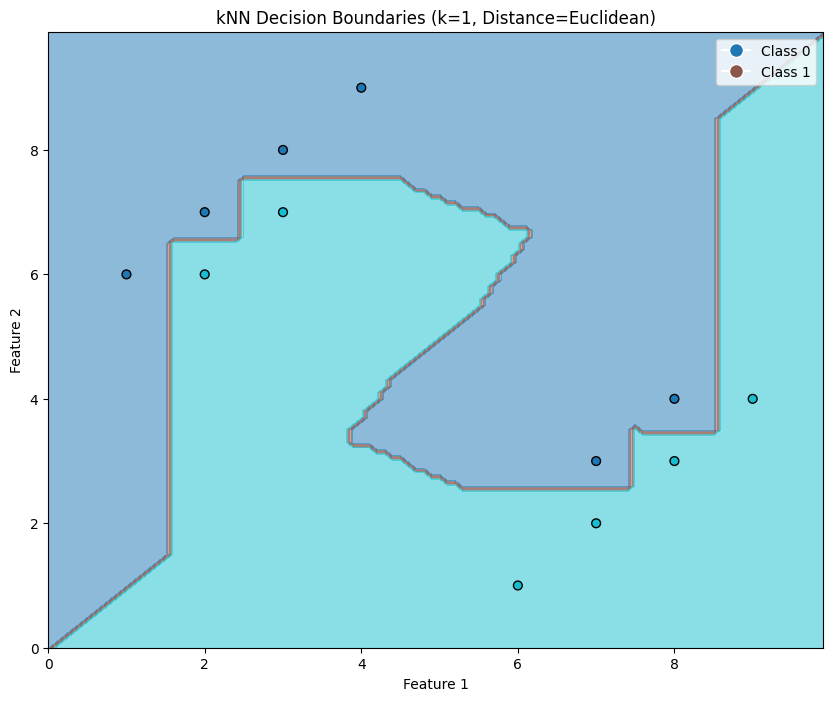

In [69]:
plot_decision_boundaries(
    classifier=knn,
    X=X,
    y=y,
    means=None,
    title=f'kNN Decision Boundaries (k={k}, Distance=Euclidean)'
)

In [84]:
distance_func = euclidean_distance

k = 2
knn = KNNClassifier(k=k, distance_func=distance_func)
knn.fit(X, y)
y_pred = knn.predict(X)

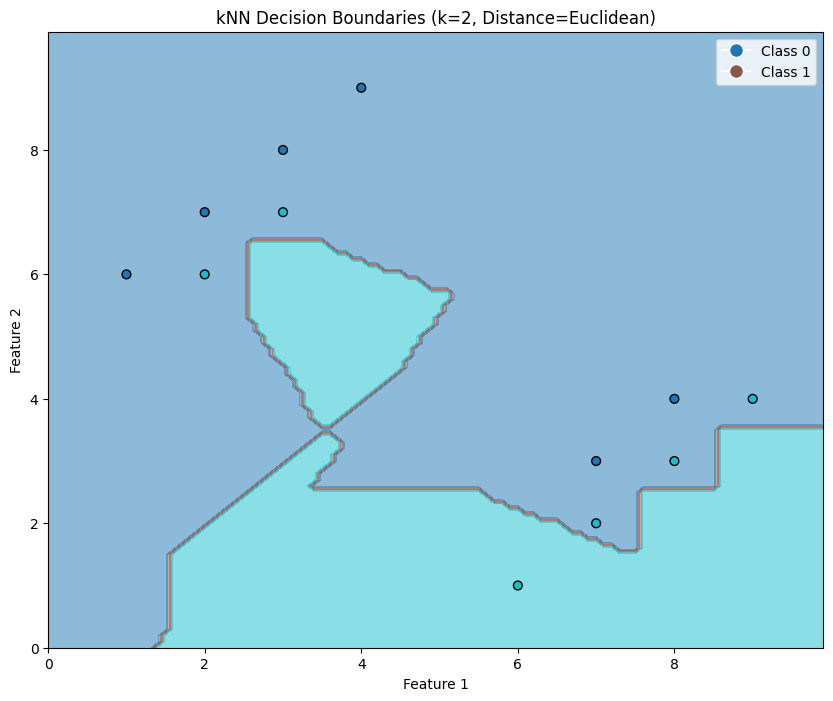

In [71]:
plot_decision_boundaries(
    classifier=knn,
    X=X,
    y=y,
    means=None,
    title=f'kNN Decision Boundaries (k={k}, Distance=Euclidean)'
)

In [85]:
distance_func = euclidean_distance

k = 3
knn = KNNClassifier(k=k, distance_func=distance_func)
knn.fit(X, y)
y_pred = knn.predict(X)

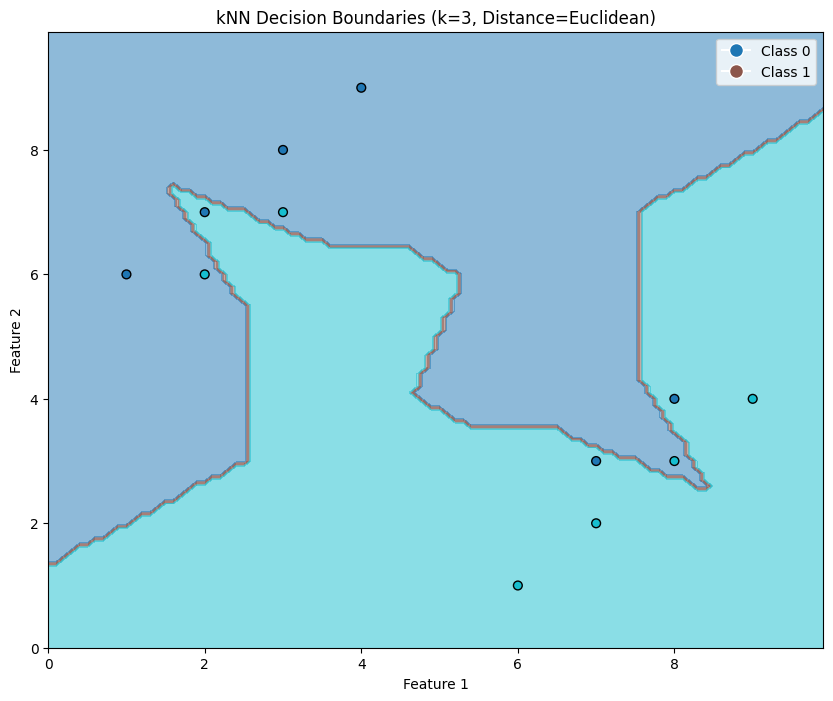

In [34]:
plot_decision_boundaries(
    classifier=knn,
    X=X,
    y=y,
    means=None,
    title=f'kNN Decision Boundaries (k={k}, Distance=Euclidean)'
)

In [86]:
distance_func = euclidean_distance

k = 4
knn = KNNClassifier(k=k, distance_func=distance_func)
knn.fit(X, y)
y_pred = knn.predict(X)

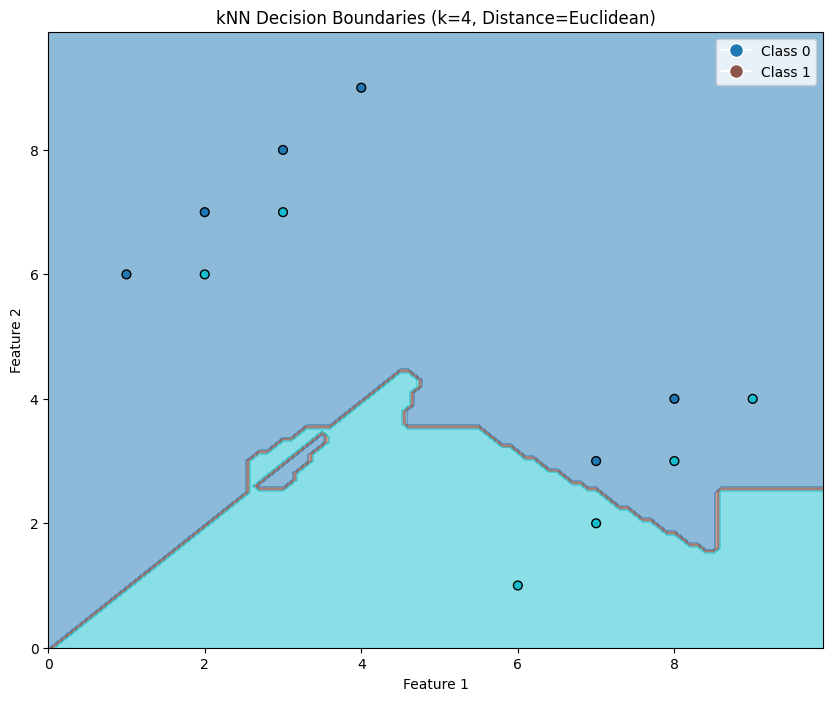

In [74]:
plot_decision_boundaries(
    classifier=knn,
    X=X,
    y=y,
    means=None,
    title=f'kNN Decision Boundaries (k={k}, Distance=Euclidean)'
)

In [87]:
distance_func = euclidean_distance

k = 5
knn = KNNClassifier(k=k, distance_func=distance_func)
knn.fit(X, y)
y_pred = knn.predict(X)

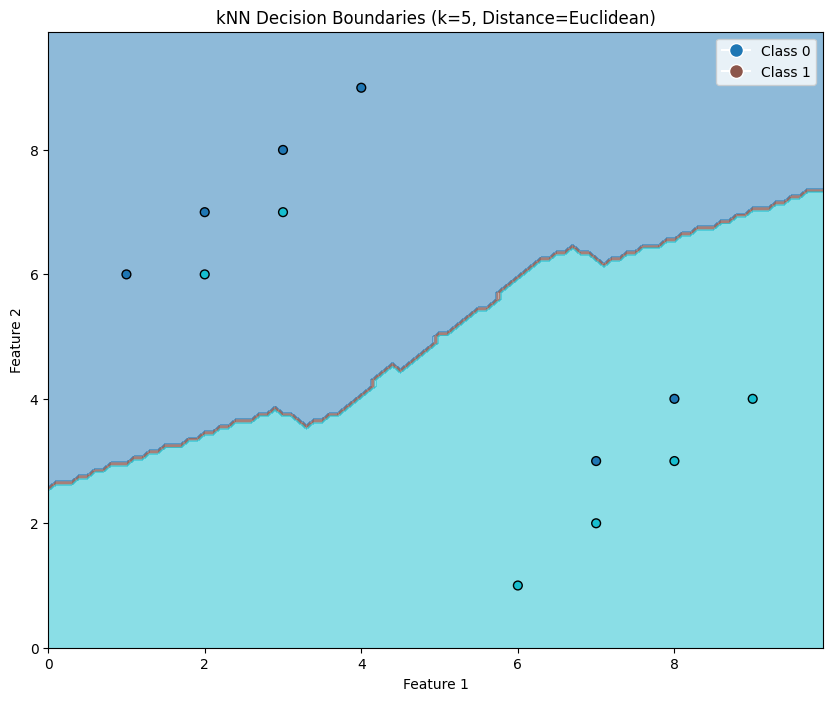

In [38]:
plot_decision_boundaries(
    classifier=knn,
    X=X,
    y=y,
    means=None,
    title=f'kNN Decision Boundaries (k={k}, Distance=Euclidean)'
)

In [89]:
n = len(X)

for k in [1, 2, 3, 4, 5]:
    errors = []
    knn = KNNClassifier(k, distance_func=euclidean_distance)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    errors = np.not_equal(y_pred, y).astype(int)
    loocv_error = 1/n * sum(errors)
    print(f"For k={k}, the LOOCV error is: {loocv_error:.4f}")

For k=1, the LOOCV error is: 0.0000
For k=2, the LOOCV error is: 0.4167
For k=3, the LOOCV error is: 0.5000
For k=4, the LOOCV error is: 0.3333
For k=5, the LOOCV error is: 0.3333
